# Co-activation contrast

In [1]:
import numpy as np
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.4.pkl")

In [3]:
posterior = [3, 6]
middle = [1, 5, 7, 9]
anterior = [2, 4, 8]

In [4]:
from coactivation import coactivation_contrast
from plotting import make_thresholded_slices

In [5]:
cut_coords = np.arange(-15, 60, 12)

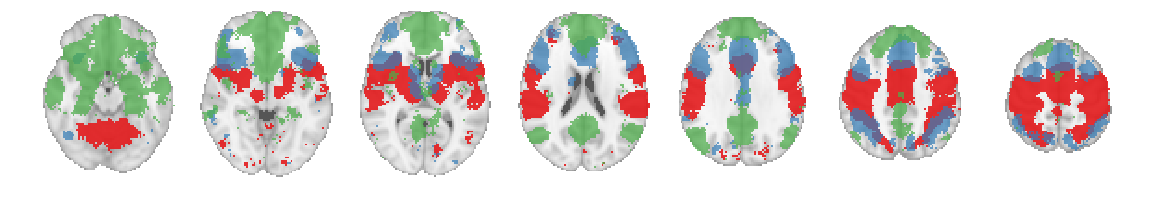

In [14]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k3.nii.gz', q = 0.001)
make_thresholded_slices(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=cut_coords, annotate=False)

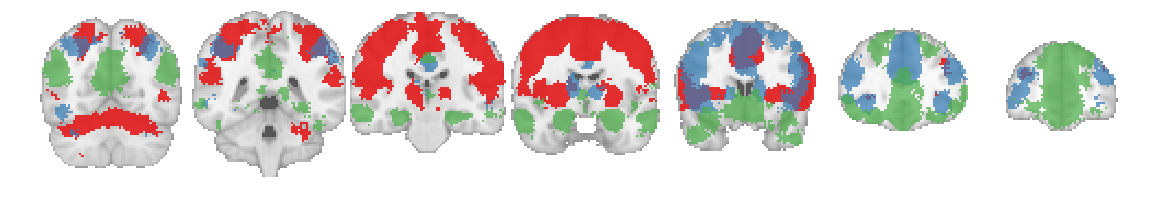

In [15]:
make_thresholded_slices(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)

/Users/aleph4/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


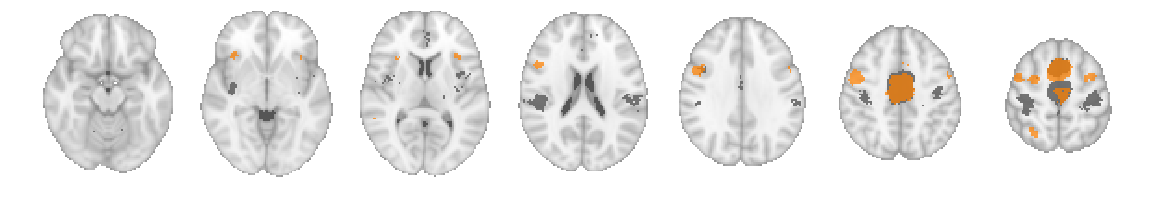

In [8]:
from plotting import nine_colors
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', posterior)
colors = list(reversed([c for i, c in enumerate(nine_colors) if i + 1 in posterior]))
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=cut_coords, annotate=False)

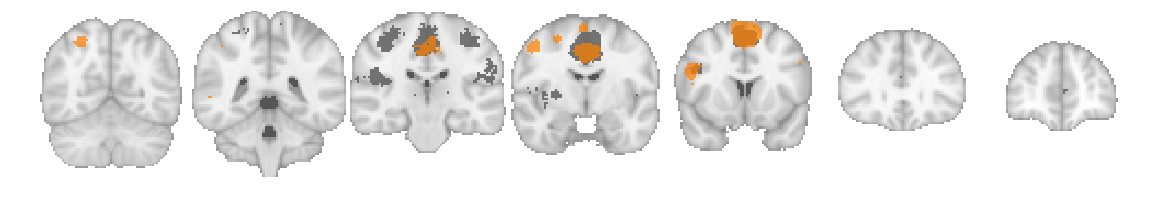

In [9]:
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)

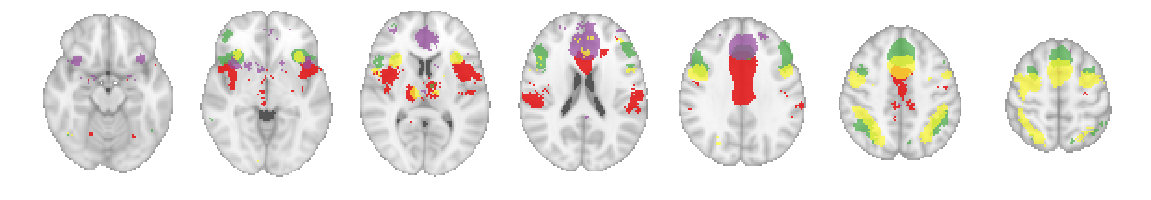

In [10]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', middle)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in middle]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

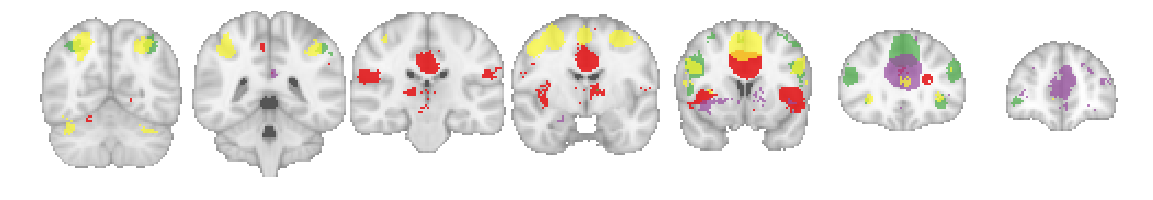

In [11]:
make_thresholded_slices(contrast_mas, colors, cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)

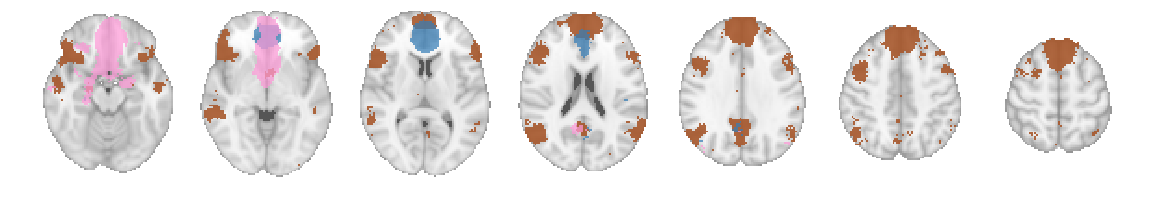

In [12]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', anterior)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in anterior]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

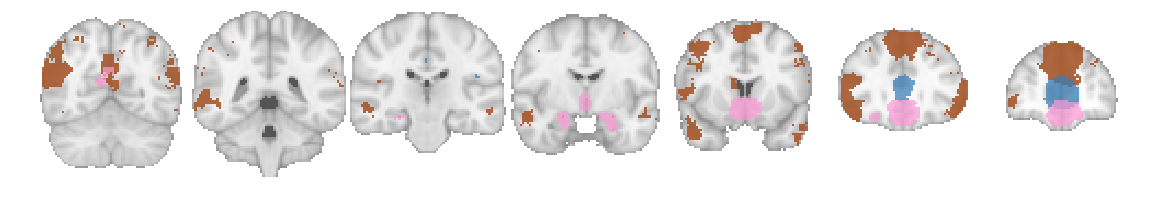

In [13]:
make_thresholded_slices(contrast_mas, colors, cut_coords=range(-60, 50, 18), 
                        display_mode='y', annotate=False)